In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
with open("../output/stream/syntentic_run_small_1/small_dataset_0_q63.json", 'r') as f:
  data = json.load(f)

In [3]:
i_bpp = []
p_bpp = []

for idx, type in enumerate(data['frame_type']):
  if type == 0:
    i_bpp.append(data['frame_bpp'][idx])
  else:
    p_bpp.append(data['frame_bpp'][idx])

i_mean = sum(i_bpp)/len(i_bpp)
p_mean = sum(p_bpp)/len(p_bpp)
savings_coeff = i_mean/p_mean

print("Mean I BPP: {} Mean P BPP: {} Savings Coeff: {}".format(i_mean, p_mean, savings_coeff))

Mean I BPP: 0.34072048611111116 Mean P BPP: 0.0768313962834362 Savings Coeff: 4.434651751663738


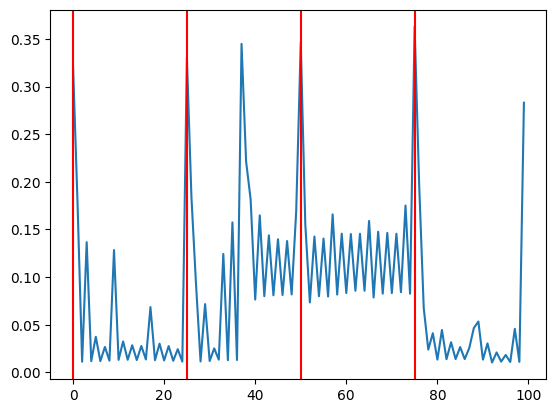

In [4]:
f_types = np.array(data['frame_type'])


plt.plot(data['frame_bpp'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

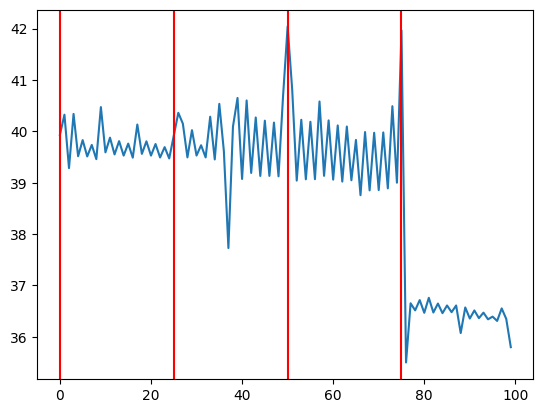

In [5]:
plt.plot(data['frame_psnr'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

### Straight video

In [6]:
with open("../output/stream/straight_no_intra_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data = json.load(f) 

with open("../output/stream/straight_no_intra_no_refresh_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data_n = json.load(f) 

with open("../output/stream/straight_with_intra_32_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data_i = json.load(f) 
  

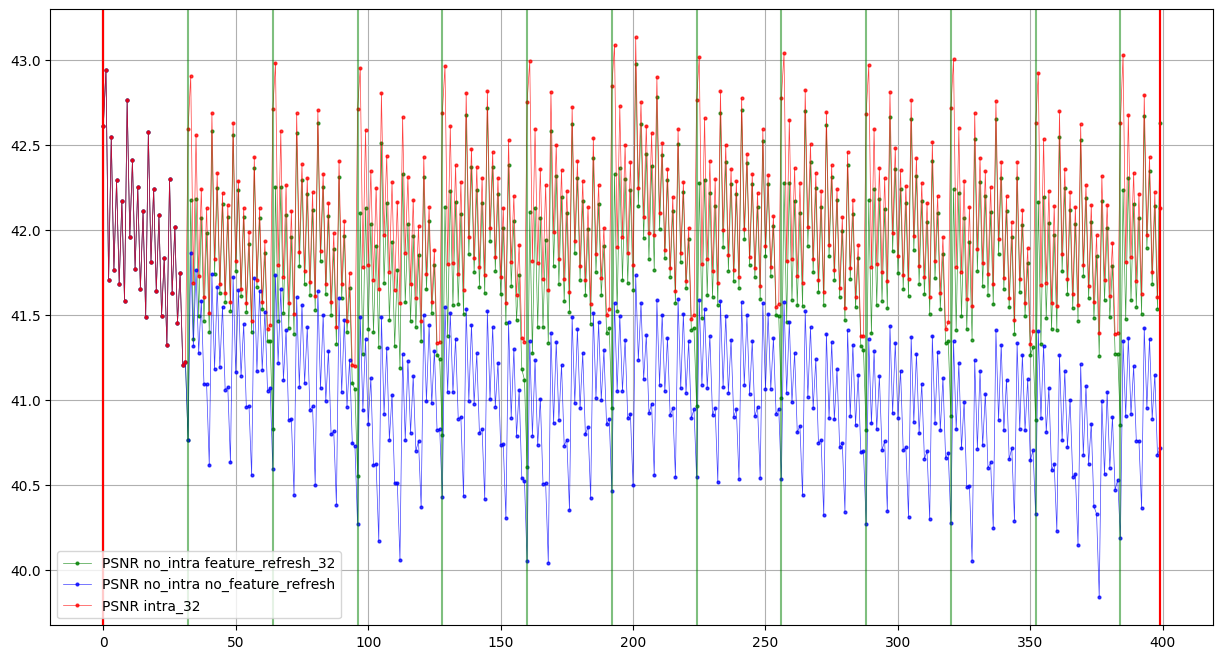

In [7]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(straight_data['frame_psnr'], label = "PSNR no_intra feature_refresh_32", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha=0.75)
plt.plot(straight_data_n['frame_psnr'], label = "PSNR no_intra no_feature_refresh", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha=0.75)
plt.plot(straight_data_i['frame_psnr'], label = "PSNR intra_32", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha=0.75)
plt.legend()

f_types = np.array(straight_data['frame_type'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

for idx in np.arange(0, len(straight_data['frame_psnr']), 32):
  plt.axvline(x=idx, color='g', alpha=0.5)

for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

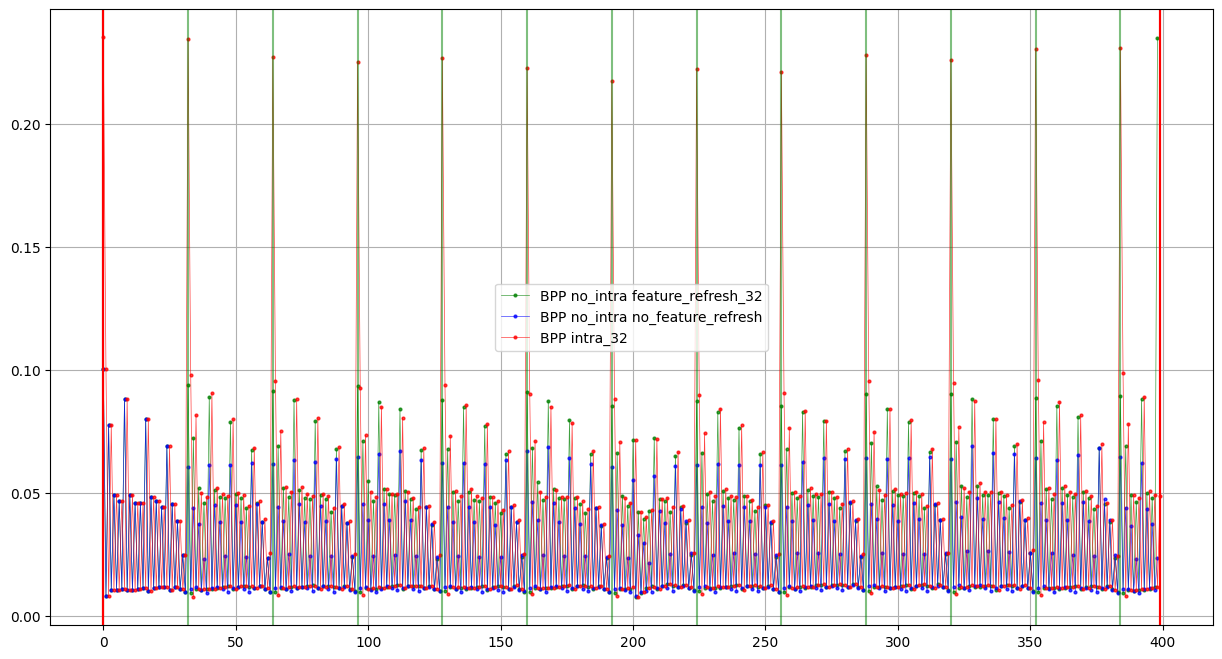

In [8]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(straight_data['frame_bpp'][1:], label = "BPP no_intra feature_refresh_32", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha=0.75)
plt.plot(straight_data_n['frame_bpp'][1:], label = "BPP no_intra no_feature_refresh", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha=0.75)
plt.plot(straight_data_i['frame_bpp'], label = "BPP intra_32", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha=0.75)
plt.legend()

f_types = np.array(straight_data['frame_type'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

for idx in np.arange(0, len(straight_data['frame_bpp']), 32):
  plt.axvline(x=idx, color='g', alpha=0.5)

for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

### Frequent switch video

In [9]:
with open("../output/stream/frequent_no_intra_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data = json.load(f) 

with open("../output/stream/frequent_no_intra_no_refresh_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_n = json.load(f) 

with open("../output/stream/frequent_with_intra_32_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_i = json.load(f)

with open("../output/stream/frequent_pred_intra_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_p = json.load(f)

with open("../output/stream/frequent_pred_decay_intra_2/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_p_d = json.load(f)

with open("../output/stream/frequent_hybrid_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_h = json.load(f)

with open("../output/stream/frequent_norm_hybrid_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_n_h = json.load(f)

with open("../output/stream/frequent_norm_hybrid_sensetive_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_n_h_s = json.load(f)


with open("../media/syntetic/frequent_dataset_0/reference_points.json", 'r') as f:
  ref_points = json.load(f)
  ref_points = [idx for idx in ref_points if idx < len(freq_data['frame_psnr'])]

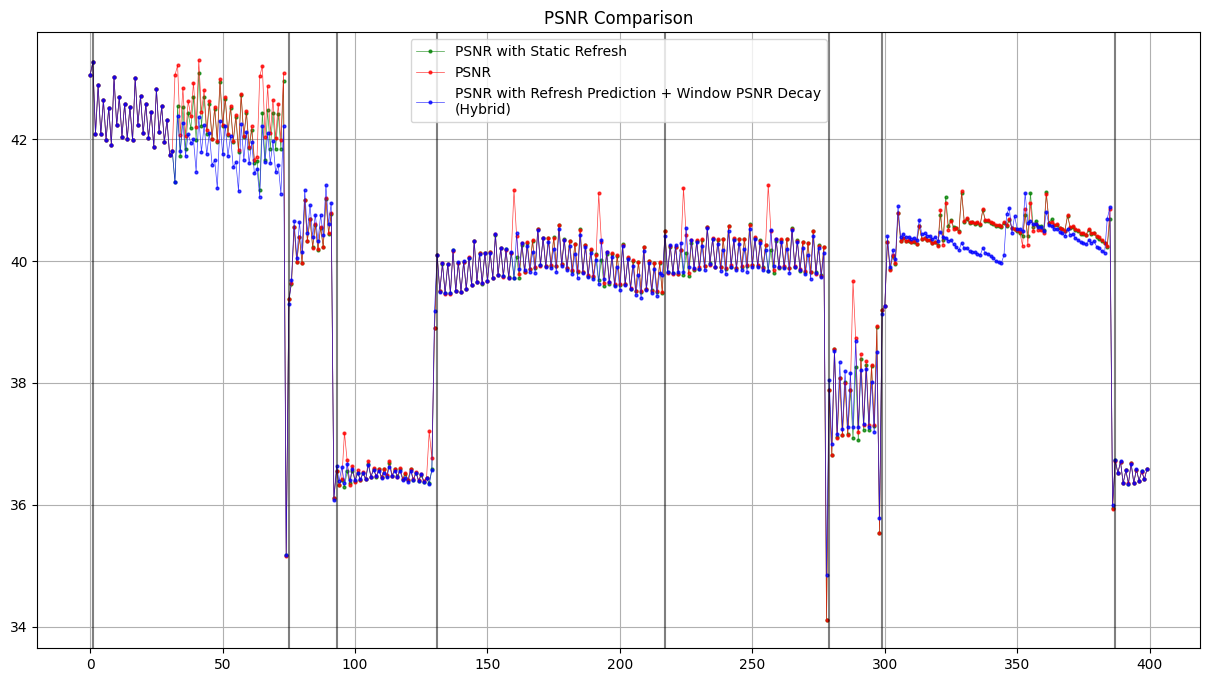

In [65]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(freq_data['frame_psnr'], label = "PSNR with Static Refresh", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha = 0.75)
# plt.plot(freq_data_n['frame_psnr'], label = "PSNR without Intra-Predictor", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha = 0.75)
plt.plot(freq_data_i['frame_psnr'], label = "PSNR", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha = 0.75)
# plt.plot(freq_data_p['frame_psnr'], label = "PSNR with Refresh Prediction", marker='o', linewidth=0.5, markersize=2, c = 'orange', alpha = 0.75)
plt.plot(freq_data_h['frame_psnr'], label = "PSNR with Refresh Prediction + Window PSNR Decay\n(Hybrid)", marker='o', linewidth=0.5, markersize=2, c = 'blue', alpha = 0.75)
# plt.plot(freq_data_n_h['frame_psnr'], label = "PSNR with Refresh Prediction + PSNR Decay\n(Hybrid)", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha = 0.75)
# plt.plot(freq_data_n_h_s['frame_psnr'][1:], label = "PSNR with Refresh Prediction + PSNR Decay\n(Hybrid)\n(Sensetive)", marker='o', linewidth=0.2, markersize=2, c = 'magenta', alpha = 0.75)
# plt.plot(freq_data_p_d['frame_psnr'], label = "PSNR with Refresh/Decay Prediction", marker='o', linewidth=0.5, markersize=2, c = 'blue', alpha = 0.75)
plt.title("PSNR Comparison")
plt.legend()

# f_types = np.array(freq_data['frame_type'])
# for idx in np.argwhere(f_types == 0):
#   plt.axvline(x=idx, color='r')

# for idx in np.arange(0, len(freq_data['frame_psnr']), 32):
#   plt.axvline(x=idx, color='g', alpha=0.5)

for idx in ref_points:
  plt.axvline(x=idx, color='k', alpha=0.5)


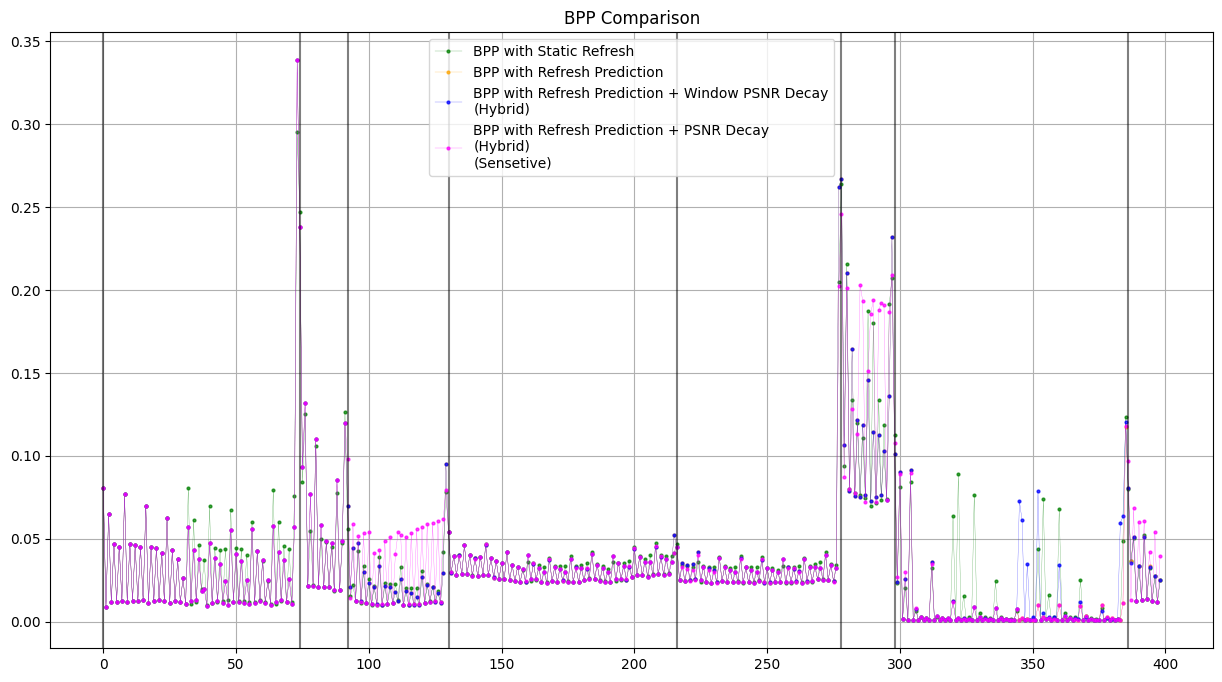

In [11]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(freq_data['frame_bpp'][1:], label = "BPP with Static Refresh", marker='o', linewidth=0.2, markersize=2, c = 'g', alpha = 0.75)
# plt.plot(freq_data_n['frame_bpp'][1:], label = "BPP without Refreshes", marker='o', linewidth=0.2, markersize=2, c = 'b', alpha = 0.75)
# plt.plot(freq_data_i['frame_bpp'][1:], label = "BPP with Intraframes", marker='o', linewidth=0.2, markersize=2, c = 'r', alpha = 0.75)
plt.plot(freq_data_p['frame_bpp'][1:], label = "BPP with Refresh Prediction", marker='o', linewidth=0.2, markersize=2, c = 'orange', alpha = 0.75)
plt.plot(freq_data_h['frame_bpp'][1:], label = "BPP with Refresh Prediction + Window PSNR Decay\n(Hybrid)", marker='o', linewidth=0.2, markersize=2, c = 'blue', alpha = 0.75)
plt.plot(freq_data_n_h_s['frame_bpp'][1:], label = "BPP with Refresh Prediction + PSNR Decay\n(Hybrid)\n(Sensetive)", marker='o', linewidth=0.2, markersize=2, c = 'magenta', alpha = 0.75)
# plt.plot(freq_data_p_d['frame_bpp'][1:], label = "BPP with Refresh/Decay Prediction", marker='o', linewidth=0.2, markersize=2, c = 'blue', alpha = 0.75)
plt.legend()
plt.title("BPP Comparison")

# for idx in np.arange(0, len(freq_data['frame_bpp']), 32):
#   plt.axvline(x=idx, color='g', alpha=0.5)

# f_types = np.array(freq_data['frame_type'])
# for idx in np.argwhere(f_types == 0):
#   plt.axvline(x=idx, color='r')

for idx in ref_points:
  plt.axvline(x=idx - 1, color='k', alpha=0.5)

#### RD curve for frequent video

In [12]:
def split_by_ref(data, ref_points):
  start_idx = 0
  psnr_rates = []
  bpp_rates = []
  for idx in ref_points:
    up_to = idx - 1
    psnr_rates.append(np.mean(data['frame_psnr'][start_idx:up_to]))
    bpp_rates.append(np.mean(data['frame_bpp'][start_idx:up_to]))
    start_idx = idx
  
  return psnr_rates, bpp_rates

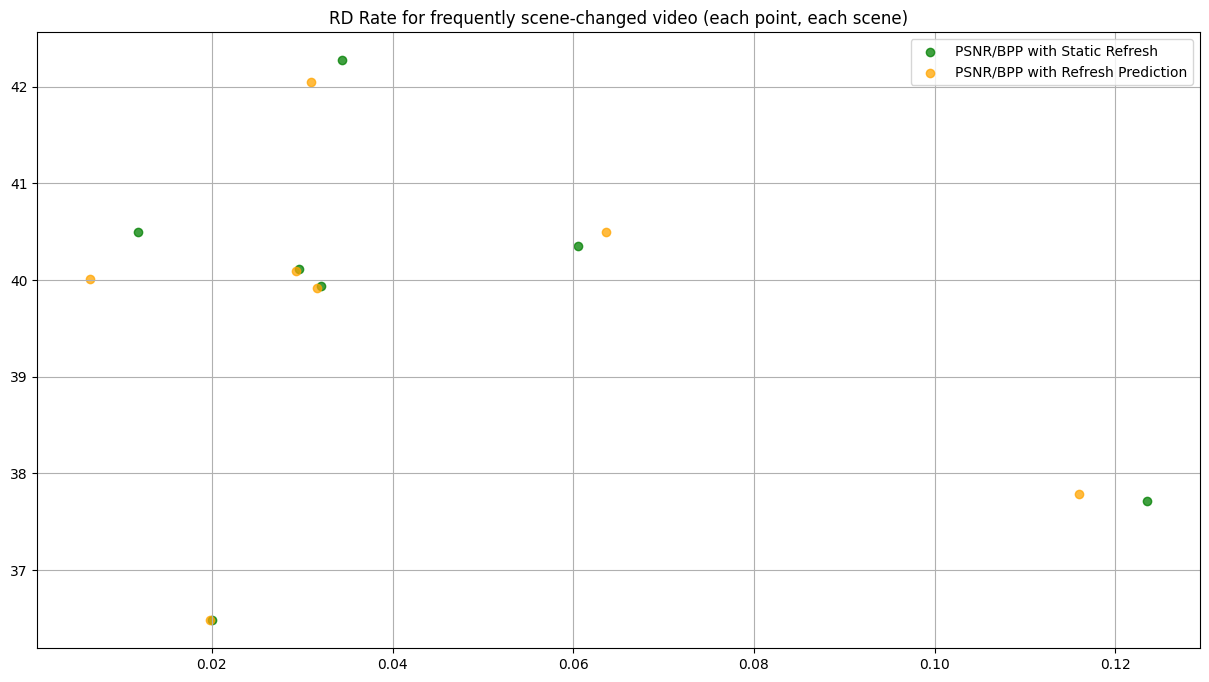

In [13]:
psnr_static, bpp_static = split_by_ref(freq_data, ref_points[1:])
psnr_pred, bpp_pred = split_by_ref(freq_data_p, ref_points[1:])

plt.figure(figsize=(15, 8))
plt.grid(True)
plt.scatter(bpp_static, psnr_static, label = "PSNR/BPP with Static Refresh", marker='o', c = 'g', alpha = 0.75)
plt.scatter(bpp_pred, psnr_pred, label = "PSNR/BPP with Refresh Prediction", marker='o', c = 'orange', alpha = 0.75)
plt.legend()
plt.title("RD Rate for frequently scene-changed video (each point, each scene)")

plt.show()

In [14]:
def bj_delta(R1, PSNR1, R2, PSNR2, mode=0):
    lR1 = np.log(R1)
    lR2 = np.log(R2)

    # find integral
    if mode == 0:
        # least squares polynomial fit
        p1 = np.polyfit(lR1, PSNR1, 3)
        p2 = np.polyfit(lR2, PSNR2, 3)

        # integration interval
        min_int = max(min(lR1), min(lR2))
        max_int = min(max(lR1), max(lR2))

        # indefinite integral of both polynomial curves
        p_int1 = np.polyint(p1)
        p_int2 = np.polyint(p2)

        # evaluates both poly curves at the limits of the integration interval
        # to find the area
        int1 = np.polyval(p_int1, max_int) - np.polyval(p_int1, min_int)
        int2 = np.polyval(p_int2, max_int) - np.polyval(p_int2, min_int)

        # find avg diff between the areas to obtain the final measure
        avg_diff = (int2-int1)/(max_int-min_int)

        x_points = np.exp(np.linspace(min_int, max_int, 100))
    else:
        # rate method: sames as previous one but with inverse order
        p1 = np.polyfit(PSNR1, lR1, 3)
        p2 = np.polyfit(PSNR2, lR2, 3)

        # integration interval
        min_int = max(min(PSNR1), min(PSNR2))
        max_int = min(max(PSNR1), max(PSNR2))

        # indefinite interval of both polynomial curves
        p_int1 = np.polyint(p1)
        p_int2 = np.polyint(p2)

        # evaluates both poly curves at the limits of the integration interval
        # to find the area
        int1 = np.polyval(p_int1, max_int) - np.polyval(p_int1, min_int)
        int2 = np.polyval(p_int2, max_int) - np.polyval(p_int2, min_int)

        # find avg diff between the areas to obtain the final measure
        avg_exp_diff = (int2-int1)/(max_int-min_int)
        avg_diff = (np.exp(avg_exp_diff)-1)*100

        x_points = np.linspace(min_int, max_int, 100)

    return avg_diff, x_points, p1, p2

In [16]:
bd_psnr, _, _, _ = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=0)
bd_rate, _, _, _ = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=1)

print("Bjontegaard Delta PSNR: {}%\nDelta Rate: {}%".format(bd_psnr, bd_rate))

Bjontegaard Delta PSNR: -0.46637551115576137%
Delta Rate: -16.7664483524696%


In [17]:
# calculate savings for BPP

mean_proc_savings = np.mean(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_p['frame_bpp'][1:])) / np.mean(freq_data['frame_bpp'][1:])
median_proc_savings = np.median(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_p['frame_bpp'][1:])) / np.median(freq_data['frame_bpp'][1:])

print("Intra Prediction bpp savings: Mean {:.2%} Median {:.2%}".format(mean_proc_savings, median_proc_savings))

Intra Prediction bpp savings: Mean 5.39% Median 0.18%


In [18]:
# calculate lost for PSNR

mean_psnr_savings = np.mean(np.array(freq_data['frame_psnr']) - np.array(freq_data_p['frame_psnr'])) / np.mean(freq_data['frame_psnr'])
median_psnr_savings = np.median(np.array(freq_data['frame_psnr']) - np.array(freq_data_p['frame_psnr'])) / np.median(freq_data['frame_psnr'])

print("Intra Prediction PSNR lost: Mean {:.2%} Median {:.2%}".format(mean_psnr_savings, median_psnr_savings))

Intra Prediction PSNR lost: Mean 0.35% Median 0.04%


In [19]:
# calculate savings for BPP (with Decay)

mean_proc_savings = np.mean(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_h['frame_bpp'][1:])) / np.mean(freq_data['frame_bpp'][1:])
median_proc_savings = np.median(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_h['frame_bpp'][1:])) / np.median(freq_data['frame_bpp'][1:])

print("Intra Prediction bpp savings: Mean {:.2%} Median {:.2%}".format(mean_proc_savings, median_proc_savings))

Intra Prediction bpp savings: Mean 2.62% Median 0.15%


In [20]:
# calculate lost for PSNR (with Decay)

mean_psnr_savings = np.mean(np.array(freq_data['frame_psnr']) - np.array(freq_data_h['frame_psnr'])) / np.mean(freq_data['frame_psnr'])
median_psnr_savings = np.median(np.array(freq_data['frame_psnr']) - np.array(freq_data_h['frame_psnr'])) / np.median(freq_data['frame_psnr'])

print("Intra Prediction PSNR lost: Mean {:.2%} Median {:.2%}".format(mean_psnr_savings, median_psnr_savings))

Intra Prediction PSNR lost: Mean 0.16% Median 0.02%


## Decaying

In [21]:
with open("../output/stream/decaying_pred_decay_intra_2_1/HoneyBee_1920x1080_120fps_420_8bit_YUV_q63.json", 'r') as f:
  deq_data_p = json.load(f) 

with open("../output/stream/decaying_no_intra_1/HoneyBee_1920x1080_120fps_420_8bit_YUV_q63.json", 'r') as f:
  deq_data = json.load(f) 

with open("../output/stream/decaying_norm_hybrid_1/HoneyBee_1920x1080_120fps_420_8bit_YUV_q63.json", 'r') as f:
  deq_data_h = json.load(f)

with open("../output/stream/decaying_norm_hybrid_sensetive_1/HoneyBee_1920x1080_120fps_420_8bit_YUV_q63.json", 'r') as f:
  deq_data_h_s = json.load(f)

# with open("../media/syntetic/frequent_dataset_0/reference_points.json", 'r') as f:
#   ref_points = json.load(f)
#   ref_points = [idx for idx in ref_points if idx < len(freq_data['frame_psnr'])]

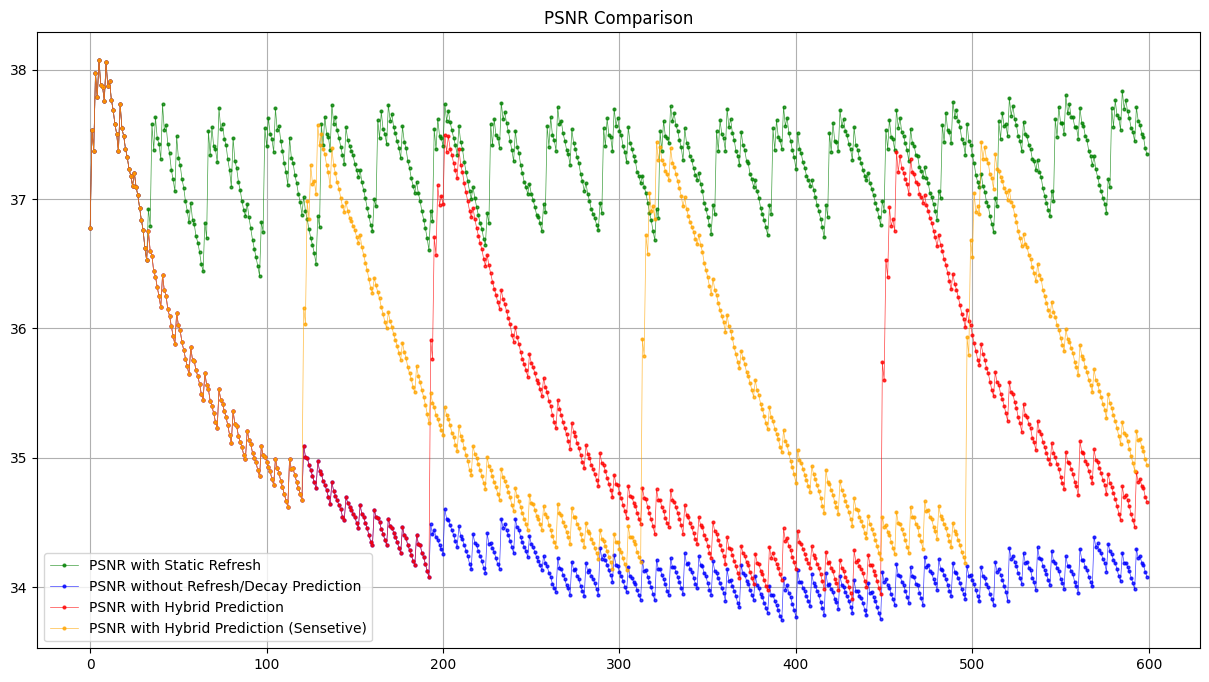

In [259]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(deq_data['frame_psnr'], label = "PSNR with Static Refresh", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha = 0.75)
plt.plot(deq_data_p['frame_psnr'], label = "PSNR without Refresh/Decay Prediction", marker='o', linewidth=0.5, markersize=2, c = 'blue', alpha = 0.75)
plt.plot(deq_data_h['frame_psnr'], label = "PSNR with Hybrid Prediction", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha = 0.75)
plt.plot(deq_data_h_s['frame_psnr'], label = "PSNR with Hybrid Prediction (Sensetive)", marker='o', linewidth=0.5, markersize=2, c = 'orange', alpha = 0.75)
plt.title("PSNR Comparison")
plt.legend()

### Explore BD-Rates (Decaying Sensensetive)

In [260]:
def get_mean_to_bpp(file_path, func, metric_name):
    with open(file_path, 'r') as f:
        run_data = json.load(f)

    psnr_list = np.array(run_data[metric_name])
    bpp_list = np.array(run_data['frame_bpp'])
    frame_types = np.array(run_data['frame_type'])

    if func:

        # # Get indexes of all the frames which type is bigger than 1
        # switch_indexes = np.where(frame_types != 1)[0]
    
        # prev_index = 0
        # for idx in switch_indexes:
        #     section_mean = np.mean(psnr_list[prev_index:idx])


        mask = func(psnr_list)

        psnr_list = psnr_list[mask]
        bpp_list = bpp_list[mask]
    
    return np.mean(psnr_list), np.mean(bpp_list)


def get_mean_metric_to_bpp_for_folder(folder_path, func = None, metric_name = "frame_psnr"):
    psnr_list = []
    bpp_list = []
    for file in os.listdir(folder_path):
        if file.endswith(".json"):
            psnr, bpp = get_mean_to_bpp(os.path.join(folder_path, file), func, metric_name)
            psnr_list.append(psnr)
            bpp_list.append(bpp)
    return psnr_list, bpp_list

In [261]:
psnr_static, bpp_static = get_mean_metric_to_bpp_for_folder("../output/stream/decaying_mulitple_no_intra_1")
psnr_pred, bpp_pred = get_mean_metric_to_bpp_for_folder("../output/stream/decaying_multiple_norm_hybrid_sensetive_1")

In [262]:
bd_psnr, psnr_int_range, p1_psnr, p2_psnr = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=0)
bd_rate, rate_int_range, p1_rate, p2_rate = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=1)

In [280]:
def bd_rate_space_plot(title, metric = "PSNR"):
    plt.figure(figsize=(15, 8))
    plt.grid(True)

    plt.plot(psnr_int_range, np.polyval(p1_psnr, np.log(psnr_int_range)), c = 'cyan',  alpha = 0.75)
    plt.plot(psnr_int_range, np.polyval(p2_psnr, np.log(psnr_int_range)), c = 'cyan',  alpha = 0.75)
    for i, x in enumerate(psnr_int_range[::10]):
        y_1 = np.polyval(p1_psnr, np.log(x))
        y_2 = np.polyval(p2_psnr, np.log(x))
        plt.plot([x,x], [min(y_1, y_2), max(y_1, y_2)], c = 'cyan', alpha = 0.75, linestyle='--', label = "" if i > 0 else f"{metric} BD-Rate Area")

    plt.plot(np.exp(np.polyval(p1_rate, rate_int_range)), rate_int_range, c = 'orange',  alpha = 0.75)
    plt.plot(np.exp(np.polyval(p2_rate, rate_int_range)), rate_int_range, c = 'orange',  alpha = 0.75)
    for i, x in enumerate(rate_int_range[::10]):
        y_1 = np.exp(np.polyval(p1_rate, x))
        y_2 = np.exp(np.polyval(p2_rate, x))
        plt.plot([min(y_1, y_2), max(y_1, y_2)], [x, x] , c = 'orange', alpha = 0.75, linestyle=':', label = "" if i > 0 else "BPP BD-Rate Area")

    x_int_points_static = np.linspace(np.min(bpp_static), np.max(bpp_static), 100)
    x_int_points_pred = np.linspace(np.min(bpp_pred), np.max(bpp_pred), 100)
    plt.plot(x_int_points_static, np.polyval(p1_psnr, np.log(x_int_points_static)), label = f"Polyfit {metric} with Static Refresh", c = 'green',  alpha = 0.75)
    plt.plot(x_int_points_pred, np.polyval(p2_psnr, np.log(x_int_points_pred)), label = f"Polyfit {metric} with Refresh Prediction", c = 'red', alpha = 0.75)

    plt.scatter(bpp_static, psnr_static, label = f"{metric}/BPP with Static Refresh", marker='o', c = 'green', alpha = 0.75)
    plt.scatter(bpp_pred, psnr_pred, label = f"{metric}/BPP with Refresh Prediction", marker='o', c = 'red', alpha = 0.75)

    plt.legend()
    plt.title(title)

    plt.show()

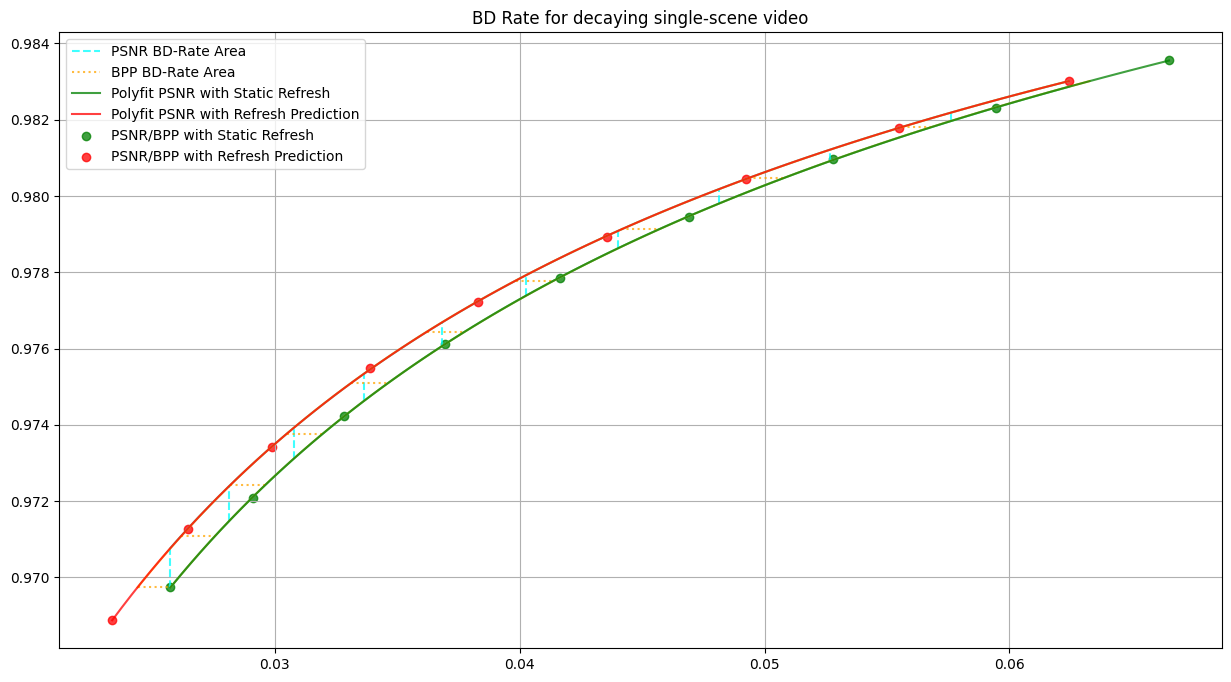

In [281]:
bd_rate_space_plot("BD Rate for decaying single-scene video")

In [282]:
print("Decaying video (same scene, 600 frames)")
print("Bjontegaard Delta PSNR: {}%\nDelta Rate: {}%".format(bd_psnr, bd_rate))

Decaying video (same scene, 600 frames)
Bjontegaard Delta PSNR: 0.000557436072325533%
Delta Rate: -3.8541103334638893%


### Explore BD-Rates (Decaying Sensensetive)
#### FULL

In [283]:
psnr_static, bpp_static = get_mean_metric_to_bpp_for_folder("../output/stream/decaying_multiple_full_no_intra_1")
psnr_pred, bpp_pred = get_mean_metric_to_bpp_for_folder("../output/stream/decaying_multiple_full_norm_hybrid_sensetive_1")

In [284]:
bd_psnr, psnr_int_range, p1_psnr, p2_psnr = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=0)
bd_rate, rate_int_range, p1_rate, p2_rate = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=1)

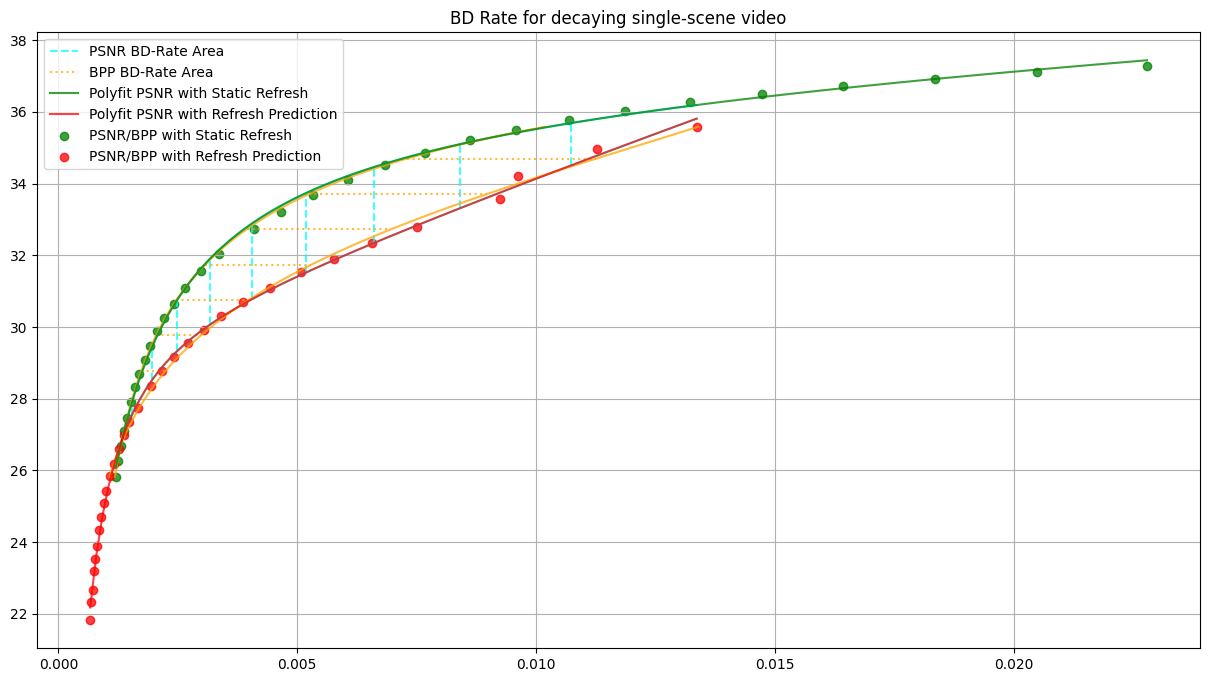

In [285]:
bd_rate_space_plot("BD Rate for decaying single-scene video")

In [286]:
print("Decaying video (same scene, 600 frames)")
print("Bjontegaard Delta PSNR: {}%\nDelta Rate: {}%".format(bd_psnr, bd_rate))

Decaying video (same scene, 600 frames)
Bjontegaard Delta PSNR: -1.4232498555655066%
Delta Rate: 41.14114954473707%


### Explore BD-Rates (Frequent Sensensetive)

In [287]:
def percentile_based_mean(arr, p_min = 0, p_max = 100):
  if type(arr) == list:
    arr = np.array(arr)

  perc_min = np.percentile(arr, p_min)

  perc_max = np.percentile(arr, p_max)

  return (arr >= perc_min) & (arr <= perc_max)

def percentile_based_mean_lambda(p_min = 0, p_max = 100):
  return lambda arr: percentile_based_mean(arr, p_min, p_max)

In [297]:
psnr_static, bpp_static = get_mean_metric_to_bpp_for_folder("../output/stream/frequent_multiple_no_intra_1", percentile_based_mean_lambda(0, 75))
psnr_pred, bpp_pred = get_mean_metric_to_bpp_for_folder("../output/stream/frequent_multiple_norm_hybrid_1", percentile_based_mean_lambda(0, 75))

In [298]:
bd_psnr, psnr_int_range, p1_psnr, p2_psnr = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=0)
bd_rate, rate_int_range, p1_rate, p2_rate = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=1)

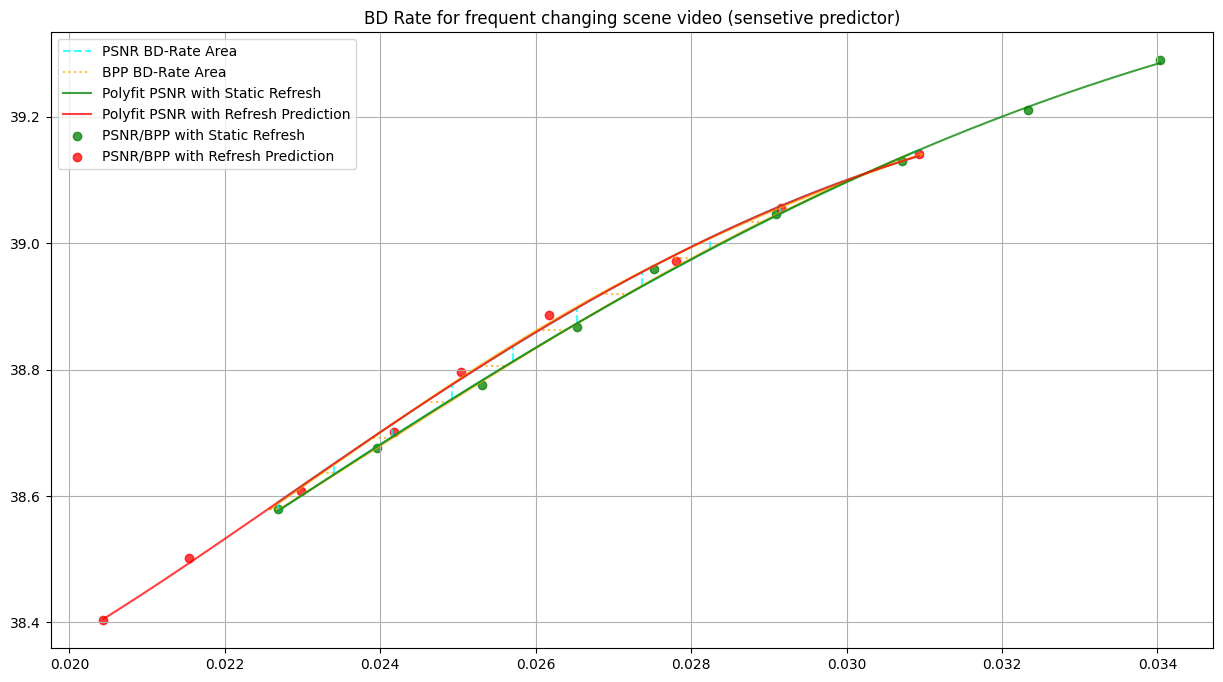

In [299]:
bd_rate_space_plot("BD Rate for frequent changing scene video (sensetive predictor)")

In [274]:
print("Frequent video (sensetive refresh)")
print("Bjontegaard Delta PSNR: {}%\nDelta Rate: {}%".format(bd_psnr, bd_rate))

Frequent video (sensetive refresh)
Bjontegaard Delta PSNR: -0.0520861310171555%
Delta Rate: 2.9837336699953143%


### Explore BD-Rates (Frequent Sensensetive)
#### Full

In [292]:
psnr_static, bpp_static = get_mean_metric_to_bpp_for_folder("../output/stream/frequent_multiple_full_no_intra_1", percentile_based_mean_lambda(0, 100), "frame_msssim")
psnr_pred, bpp_pred = get_mean_metric_to_bpp_for_folder("../output/stream/frequent_multiple_full_norm_hybrid_1", percentile_based_mean_lambda(0, 100), "frame_msssim")

In [293]:
psnr_static = psnr_static[-9:]
psnr_pred = psnr_pred[-9:]
bpp_static = bpp_static[-9:]
bpp_pred = bpp_pred[-9:]

In [294]:
bd_psnr, psnr_int_range, p1_psnr, p2_psnr = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=0)
bd_rate, rate_int_range, p1_rate, p2_rate = bj_delta(bpp_static, psnr_static, bpp_pred, psnr_pred, mode=1)

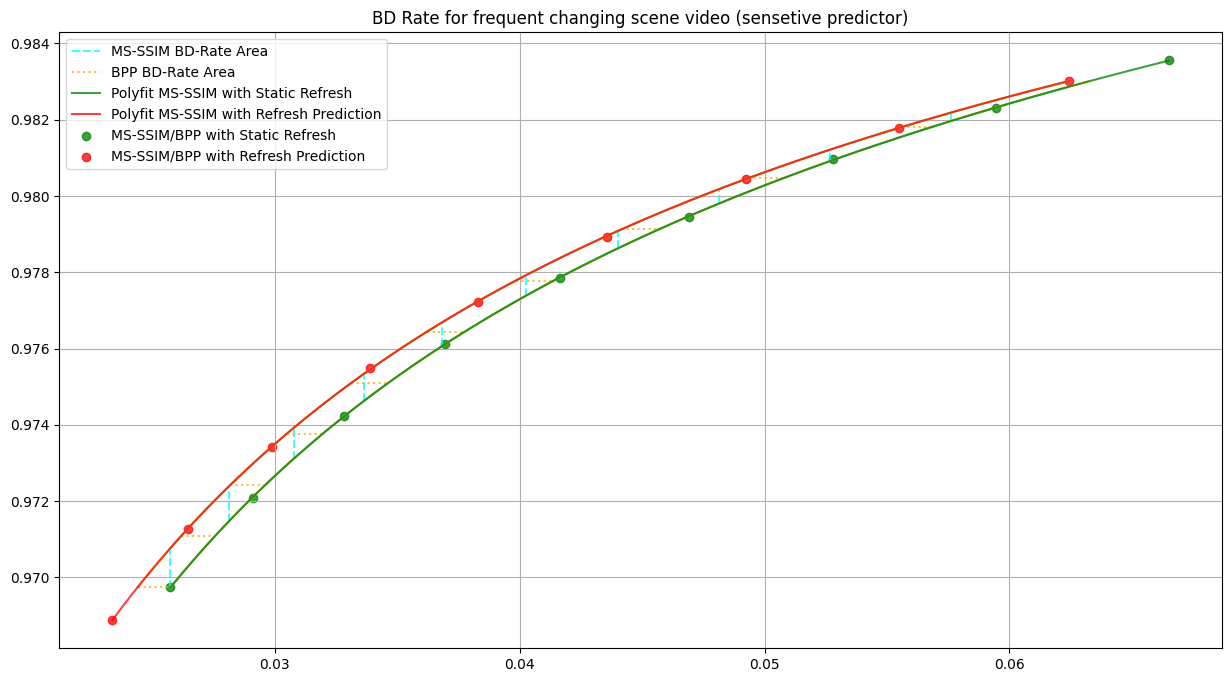

In [295]:
bd_rate_space_plot("BD Rate for frequent changing scene video (sensetive predictor)", "MS-SSIM")

In [296]:
print("Frequent video (sensetive refresh)")
print("Bjontegaard Delta MS-SSIM: {}%\nDelta Rate: {}%".format(bd_psnr, bd_rate))

Frequent video (sensetive refresh)
Bjontegaard Delta MS-SSIM: 0.000557436072325533%
Delta Rate: -3.8541103334638893%
